In [48]:
# Step 1: Importing necessary libraries
import pandas as pd  # For handling datasets
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # To split dataset into training and testing
from sklearn.preprocessing import StandardScaler  # For scaling numerical data

# Step 2: Loading the dataset
file_path = r"C:\Users\khush\Downloads\Caesarian Section Classification Dataset(CSV).csv" 
df = pd.read_csv(file_path)

# Step 3: Checking for missing values
print("Missing values in dataset:")
print(df.isnull().sum())

# Step 4: Ensuring all column names are correct
df.rename(columns={'Delivery No': 'Delivery No', 'Blood of Pressure': 'Blood Pressure'}, inplace=True)

# Step 5: Checking and Encoding the Target Variable (Caesarian)
if 'Caesarian' in df.columns:
    df['Caesarian'] = df['Caesarian'].str.lower().map({'no': 0, 'yes': 1})
else:
    print("Error: 'Caesarian' column not found!")

# Step 6: Handling Categorical Variables
if all(col in df.columns for col in ['Delivery Time', 'Blood Pressure', 'Heart Problem']):
    df['Delivery Time'] = df['Delivery Time'].str.lower().map({'timely': 0, 'premature': 1, 'latecomer': 2})
    df['Blood Pressure'] = df['Blood Pressure'].str.lower().map({'normal': 0, 'low': 1, 'high': 2})
    df['Heart Problem'] = df['Heart Problem'].str.lower().map({'apt': 0, 'inept': 1})
else:
    print("Error: One or more categorical columns missing!")

# Step 7: Handling Missing Values (Mean Imputation for Age if missing)
if df['Age'].isnull().sum() > 0:
    df['Age'].fillna(df['Age'].mean(), inplace=True)

# Step 8: Defining Features (X) and Target (y)
X = df.drop(columns=['Caesarian'])  # Features
y = df['Caesarian']  # Target variable

# Step 9: Splitting Data into Training and Testing Sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Normalizing Numerical Features (Only for models like Logistic Regression & SVM)
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']]).astype(float)
X_test['Age'] = scaler.transform(X_test[['Age']]).astype(float)

# Step 11: Converting Categorical Features Back to Integer
X_train[['Delivery No', 'Delivery Time', 'Blood Pressure', 'Heart Problem']] = \
    X_train[['Delivery No', 'Delivery Time', 'Blood Pressure', 'Heart Problem']].astype(int)

X_test[['Delivery No', 'Delivery Time', 'Blood Pressure', 'Heart Problem']] = \
    X_test[['Delivery No', 'Delivery Time', 'Blood Pressure', 'Heart Problem']].astype(int)

# Step 12: Printing Final Processed Dataset Sample
print("\nFinal Processed Dataset (First 5 Rows):")
print(X_train.head())

# Step 13: Confirming Data Types
print("\nData Types of Processed Features:")
print(X_train.dtypes)

# Step 14: Confirming Target Variable is Binary
print("\nUnique Values in Target Variable:", y_train.unique())


Missing values in dataset:
Age                  0
Delivery No          0
Delivery Time        0
Blood of Pressure    0
Heart Problem        0
Caesarian            0
dtype: int64

Final Processed Dataset (First 5 Rows):
         Age  Delivery No  Delivery Time  Blood Pressure  Heart Problem
73  0.916878            3              0               0              1
61 -1.827159            1              0               0              0
55 -0.560681            2              0               0              0
40 -0.138521            1              0               2              1
9  -0.138521            1              1               0              0

Data Types of Processed Features:
Age               float64
Delivery No         int32
Delivery Time       int32
Blood Pressure      int32
Heart Problem       int32
dtype: object

Unique Values in Target Variable: [0 1]



Model Evaluation on Test Set:
Accuracy: 0.75
Precision: 0.7272727272727273
Recall: 0.8888888888888888
F1-score: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.73      0.89      0.80         9

    accuracy                           0.75        16
   macro avg       0.76      0.73      0.73        16
weighted avg       0.76      0.75      0.74        16


Overfitting Check:
Training Accuracy: 0.953125
Testing Accuracy: 0.75


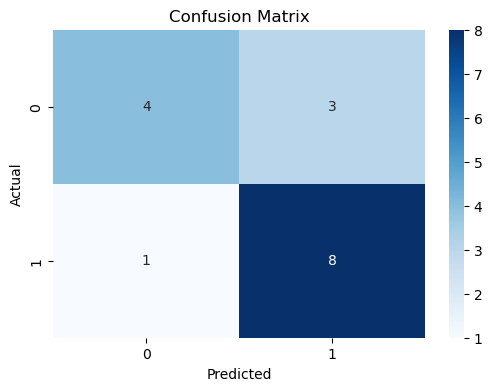

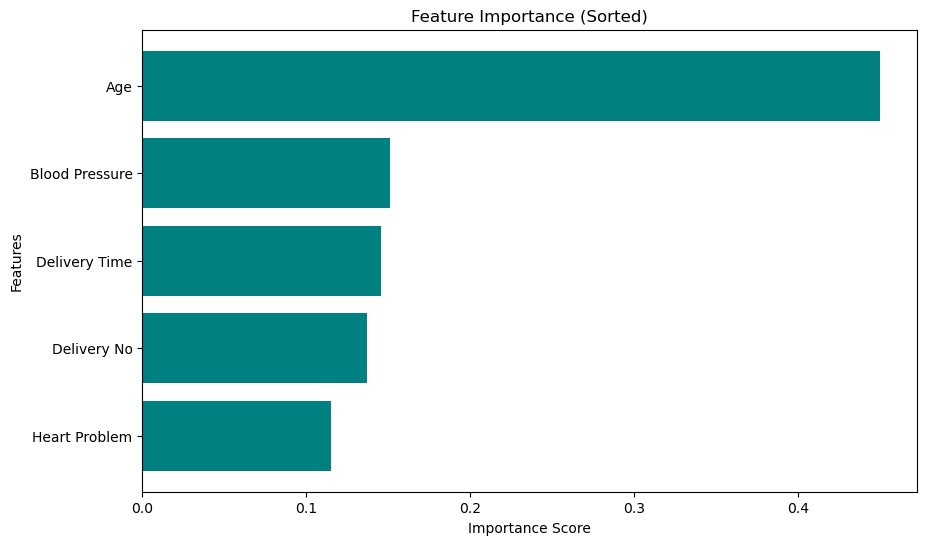

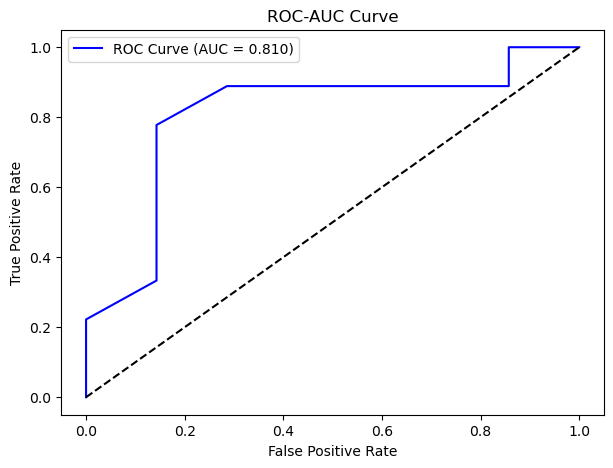


Cross-Validation Accuracy: 0.471 ± 0.094

Best Parameters from GridSearchCV: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
Best F1-score: 0.5671288515406163

Best Parameters from RandomizedSearchCV: {'n_estimators': 500, 'max_features': 'log2', 'criterion': 'gini'}
Best F1-score: 0.5671288515406163

Final Model Evaluation with Best Parameters:
Accuracy: 0.6875
Precision: 0.6666666666666666
Recall: 0.8888888888888888
F1-score: 0.7619047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.67      0.89      0.76         9

    accuracy                           0.69        16
   macro avg       0.71      0.66      0.65        16
weighted avg       0.70      0.69      0.67        16



In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# =======================
# df = pd.read_csv("processed_data.csv")  # Uncomment if loading from a file
X = df.drop(columns=['Caesarian'])  # Assuming 'Caesarian' is the target column
y = df['Caesarian']

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =======================
# Train Random Forest Classifier (Handling Class Imbalance)
# =======================
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', class_weight='balanced', random_state=42)
rf_clf.fit(X_train, y_train)

# =======================
# Make Predictions
# =======================
y_pred = rf_clf.predict(X_test)
y_train_pred = rf_clf.predict(X_train)  # Checking overfitting

# =======================
# Model Evaluation
# =======================
print("\nModel Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Check for Overfitting
print("\nOverfitting Check:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))

# =======================
# Confusion Matrix
# =======================
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# =======================
# Feature Importance Visualization (Optimized)
# =======================
feature_importances = rf_clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='teal')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Sorted)')
plt.gca().invert_yaxis()  # Most important feature on top
plt.show()

# =======================
# ROC-AUC Curve (For Binary Classification)
# =======================
y_probs = rf_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# =======================
# Cross-Validation (5-Fold)
# =======================
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))

# =======================
# Hyperparameter Tuning - GridSearchCV
# =======================
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                           param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# =======================
# Hyperparameter Tuning - RandomizedSearchCV
# =======================
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                                   param_dist, cv=5, scoring='f1', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("\nBest Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best F1-score:", random_search.best_score_)

# =======================
# Evaluate Model with Best Hyperparameters
# =======================
best_model = random_search.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\nFinal Model Evaluation with Best Parameters:")
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Precision:", precision_score(y_test, y_best_pred))
print("Recall:", recall_score(y_test, y_best_pred))
print("F1-score:", f1_score(y_test, y_best_pred))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred))


In [20]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable


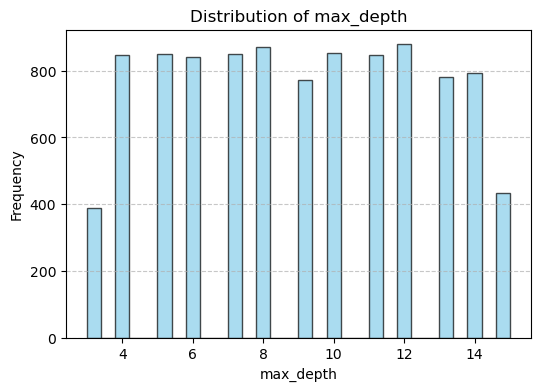

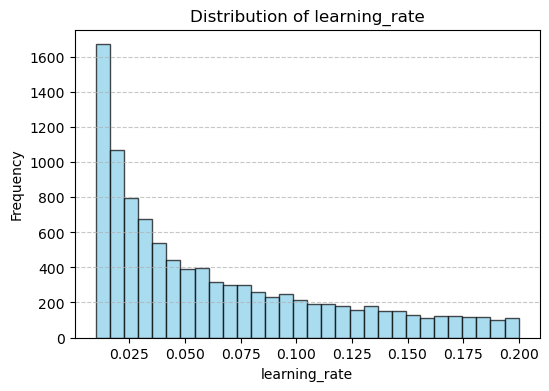

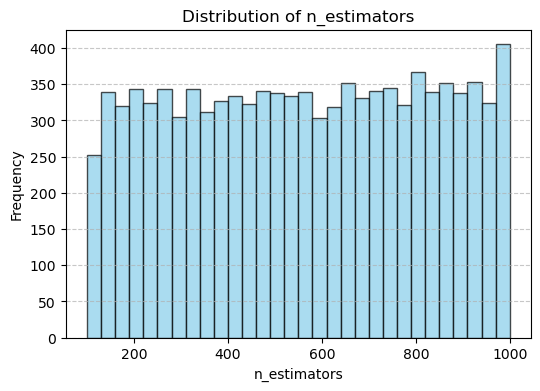

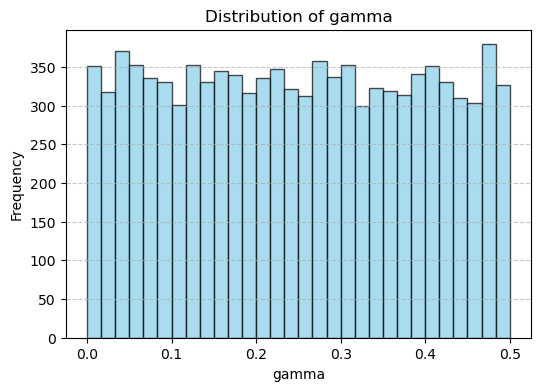

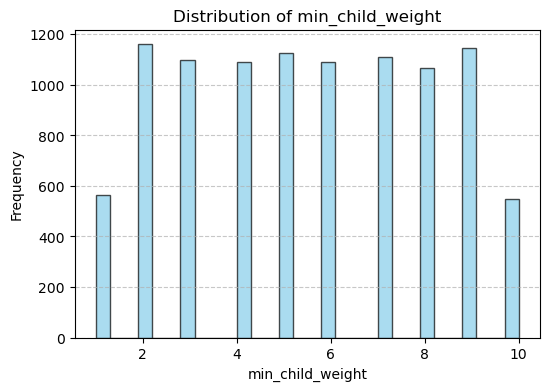

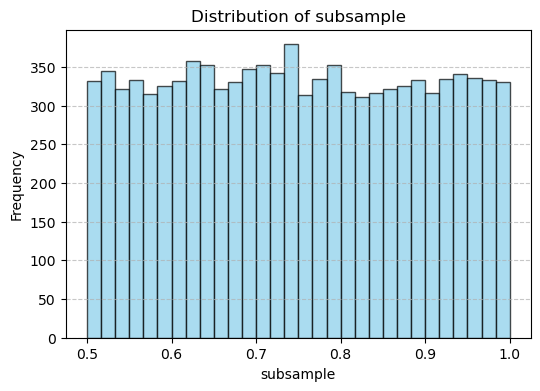

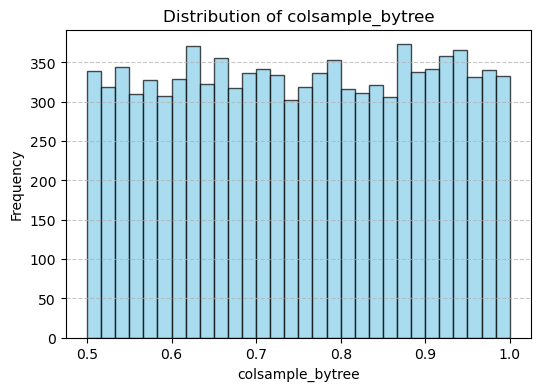

100%|███████████████████████████████████████████████| 50/50 [00:08<00:00,  5.99trial/s, best loss: -0.8695652173913043]
Precision: 0.769
Recall: 1.000
F1 Score: 0.870
ROC-AUC: 0.750


<Figure size 1000x600 with 0 Axes>

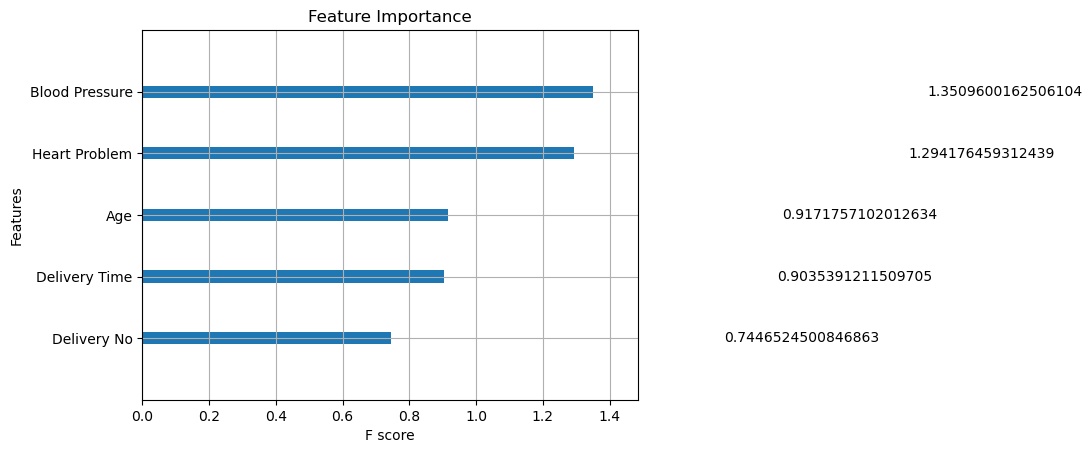

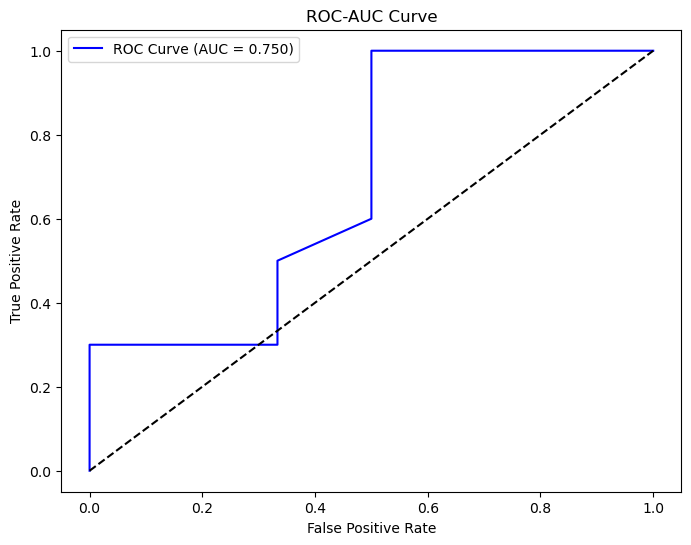

{'fold': 0, 'precision': 0.5, 'recall': 0.25, 'f1': 0.3333333333333333}
{'fold': 1, 'precision': 0.6666666666666666, 'recall': 0.5, 'f1': 0.5714285714285714}
{'fold': 2, 'precision': 0.4, 'recall': 0.4, 'f1': 0.4}
{'fold': 3, 'precision': 0.6666666666666666, 'recall': 1.0, 'f1': 0.8}
{'fold': 4, 'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1': 0.8333333333333334}
{'fold': 5, 'precision': 0.6666666666666666, 'recall': 0.8, 'f1': 0.7272727272727273}
{'fold': 6, 'precision': 0.42857142857142855, 'recall': 1.0, 'f1': 0.6}
{'fold': 7, 'precision': 0.7142857142857143, 'recall': 0.8333333333333334, 'f1': 0.7692307692307693}
{'fold': 8, 'precision': 0.75, 'recall': 0.6, 'f1': 0.6666666666666666}
{'fold': 9, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}
   fold  precision    recall        f1
0     0   0.500000  0.250000  0.333333
1     1   0.666667  0.500000  0.571429
2     2   0.400000  0.400000  0.400000
3     3   0.666667  1.000000  0.800000
4     4   0.833333  0.833333 

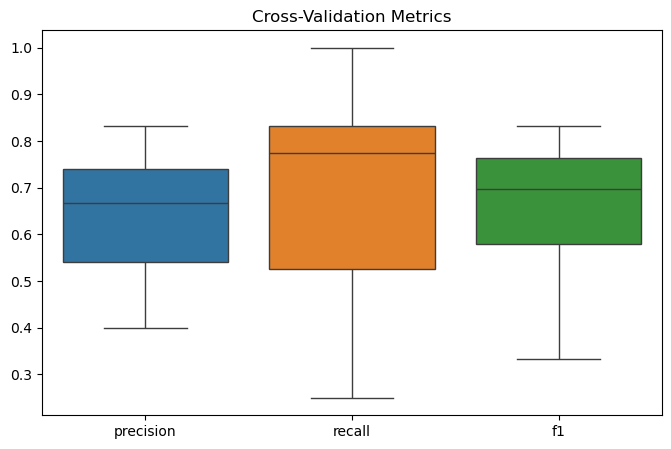

In [27]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.stochastic import sample

# Load preprocessed data (Ensure `X` and `y` are defined before this step)
X = df.drop(columns=['Caesarian'])  # Replace 'target' with your actual column name
y = df['Caesarian']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space for Bayesian Optimization
space = {
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 10),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Function to sample hyperparameters
def sample_hyperparameter(hyperparam, n_samples=10000):
    return [sample(hyperparam) for _ in range(n_samples)]

# Visualizing the hyperparameter space
n_samples = 10000
hyper_samples = {key: sample_hyperparameter(space[key], n_samples) for key in space}

for param, values in hyper_samples.items():
    plt.figure(figsize=(6, 4))
    plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {param}")
    plt.xlabel(param)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Define the objective function for optimization
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        **params,
        use_label_encoder=False,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    
    return {'loss': -f1, 'status': STATUS_OK}

# Run Bayesian Optimization
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Convert best_params back to correct types
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])

# Train the best model
best_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params,
    use_label_encoder=False,
    random_state=42
)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Compute Performance Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {auc:.3f}")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='gain')
plt.title("Feature Importance")
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

# Cross-validation with XGBoost
kf = KFold(n_splits=10, shuffle=True, random_state=50)
results = []
for k, (train_idx, test_idx) in enumerate(kf.split(X)):
    model = xgb.XGBClassifier(objective='binary:logistic', **best_params)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    result = {
        'fold': k,
        'precision': precision_score(y.iloc[test_idx], y_pred),
        'recall': recall_score(y.iloc[test_idx], y_pred),
        'f1': f1_score(y.iloc[test_idx], y_pred)
    }
    print(result)
    results.append(result)

# Convert results to DataFrame
cv_results = pd.DataFrame(results)
print(cv_results)

# Visualizing cross-validation results
plt.figure(figsize=(8, 5))
sns.boxplot(data=cv_results[['precision', 'recall', 'f1']])
plt.title("Cross-Validation Metrics")
plt.show()


In [30]:
!pip install -U sentence-transformers gensim
!pip install -U torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.83      0.56      0.67         9

    accuracy                           0.69        16
   macro avg       0.72      0.71      0.69        16
weighted avg       0.73      0.69      0.68        16



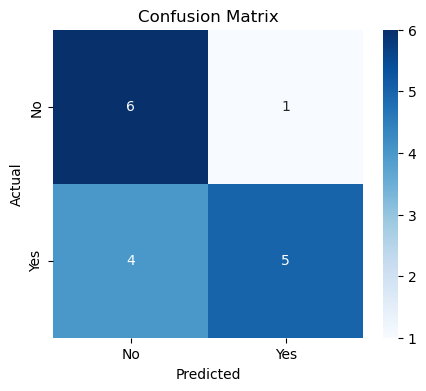

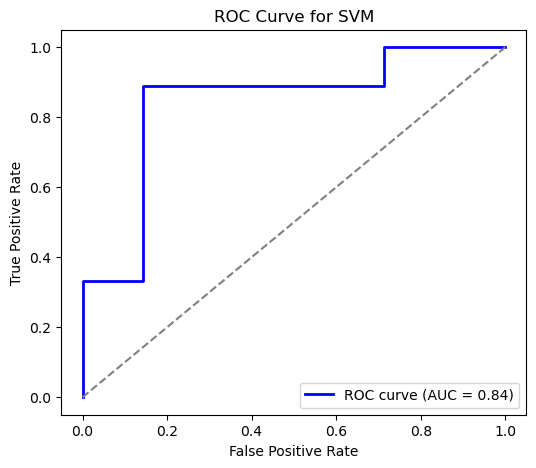

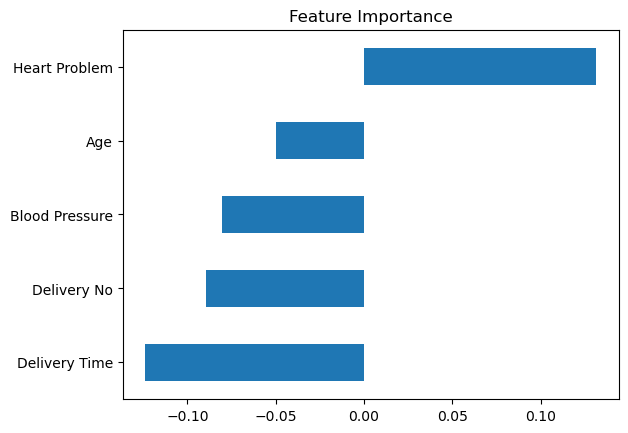

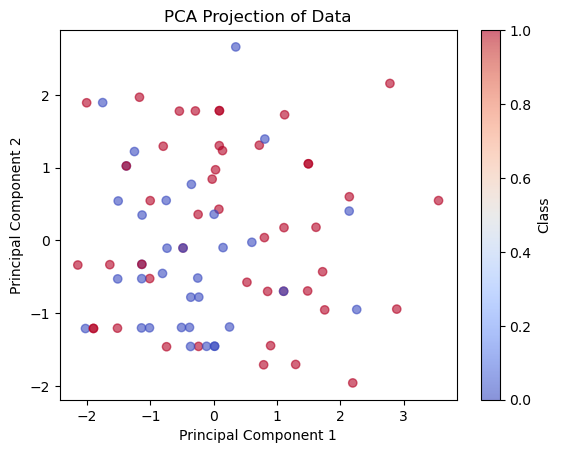

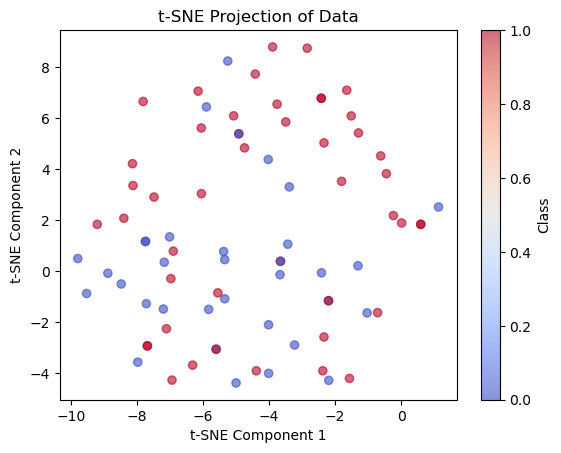

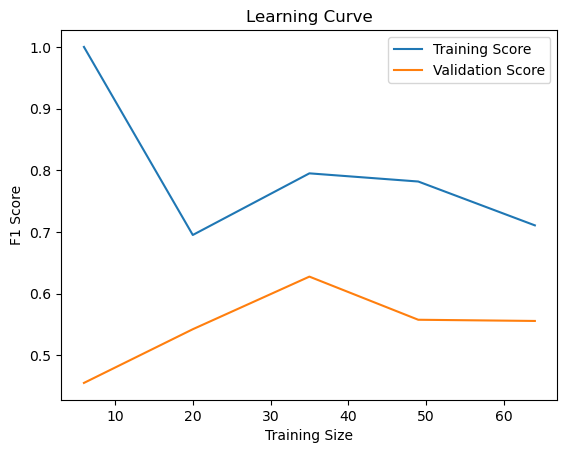

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance


# Encoding categorical variables
label_encoders = {}
for col in ['Delivery Time', 'Blood Pressure', 'Heart Problem', 'Caesarian']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['Caesarian'])
y = df['Caesarian']

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# SVM Model with class imbalance handling
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)

# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

# Predictions
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.show()

# Feature Importance using Permutation Importance
perm_importance = permutation_importance(best_svm, X_test, y_test, scoring='f1')
feature_importance = pd.Series(perm_importance.importances_mean, index=df.drop(columns=['Caesarian']).columns)
feature_importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Data")
plt.colorbar(label="Class")
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Data")
plt.colorbar(label="Class")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_scaled, y, cv=5, scoring='f1')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve")
plt.legend()
plt.show()
